In [1]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep

In [5]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='sst'
SSTdate='2022-11-0'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
#    files = [f for f in files if isfile(join(fpath,f)) and (f[-4:]=='.npy') and (f[:13]=='SST_'+SSTdate) and (f[13] in ['1'])]
    files = [f for f in files if isfile(join(fpath,f)) and (f[-4:]=='.npy') and (f[:13]=='SST_'+SSTdate) ]
    print(len(files),files[0])
for i,f in enumerate(files):
    print(i,f)
#tmin=int(files[0][18:18+2])
#tsec=int(files[0][21:21+2])
#print(tmin,tsec)
tsec=int(files[0][18:18+2])*60+int(files[0][21:21+2])
print("time offset %is"%tsec)

24 SST_2022-11-04-16-04-32.npy
0 SST_2022-11-04-16-04-32.npy
1 SST_2022-11-04-17-04-32.npy
2 SST_2022-11-04-18-04-32.npy
3 SST_2022-11-04-19-04-32.npy
4 SST_2022-11-04-20-04-32.npy
5 SST_2022-11-04-21-04-32.npy
6 SST_2022-11-04-22-04-32.npy
7 SST_2022-11-04-23-04-32.npy
8 SST_2022-11-05-00-04-32.npy
9 SST_2022-11-05-01-04-32.npy
10 SST_2022-11-05-02-04-32.npy
11 SST_2022-11-05-03-04-32.npy
12 SST_2022-11-05-04-04-32.npy
13 SST_2022-11-05-05-04-32.npy
14 SST_2022-11-05-06-04-32.npy
15 SST_2022-11-05-07-04-32.npy
16 SST_2022-11-05-08-04-32.npy
17 SST_2022-11-05-09-04-32.npy
18 SST_2022-11-05-10-04-32.npy
19 SST_2022-11-05-11-04-32.npy
20 SST_2022-11-05-12-04-32.npy
21 SST_2022-11-05-13-04-32.npy
22 SST_2022-11-05-14-04-32.npy
23 SST_2022-11-05-15-04-32.npy
time offset 272s


In [6]:
freqs=np.arange(512)/512*100
freq1=40;i1=np.argmin(np.abs(freqs-freq1))
freq2=70;i2=np.argmin(np.abs(freqs-freq2))
freq3=62;i3=np.argmin(np.abs(freqs-freq3))
#print(i2,i1,freqs[i1],freqs[i2])

In [7]:

D=[]
flist=[]
for f in files[:]:
  print(f)
  D2=np.load(fpath+'/'+f)[:,:18,:]
  ns=D2.shape
#  print(ns)
  if ns[0]!=3600: continue;
  D2=D2.reshape(ns[0]//600,600,ns[1],ns[2])
  D2=np.percentile(D2,50,axis=1)
  D.append(D2)
  flist.append(f)
  print("    ",D[-1].shape)
D=np.array(D)
print(D.shape)
ns=D.shape
D=D.reshape([ns[0]*ns[1],ns[2],ns[3]])
print(D.shape)


SST_2022-11-04-16-04-32.npy
     (6, 18, 512)
SST_2022-11-04-17-04-32.npy
     (6, 18, 512)
SST_2022-11-04-18-04-32.npy
     (6, 18, 512)
SST_2022-11-04-19-04-32.npy
     (6, 18, 512)
SST_2022-11-04-20-04-32.npy
     (6, 18, 512)
SST_2022-11-04-21-04-32.npy
     (6, 18, 512)
SST_2022-11-04-22-04-32.npy
     (6, 18, 512)
SST_2022-11-04-23-04-32.npy
     (6, 18, 512)
SST_2022-11-05-00-04-32.npy
     (6, 18, 512)
SST_2022-11-05-01-04-32.npy
     (6, 18, 512)
SST_2022-11-05-02-04-32.npy
     (6, 18, 512)
SST_2022-11-05-03-04-32.npy
     (6, 18, 512)
SST_2022-11-05-04-04-32.npy
     (6, 18, 512)
SST_2022-11-05-05-04-32.npy
     (6, 18, 512)
SST_2022-11-05-06-04-32.npy
     (6, 18, 512)
SST_2022-11-05-07-04-32.npy
     (6, 18, 512)
SST_2022-11-05-08-04-32.npy
     (6, 18, 512)
SST_2022-11-05-09-04-32.npy
     (6, 18, 512)
SST_2022-11-05-10-04-32.npy
     (6, 18, 512)
SST_2022-11-05-11-04-32.npy
     (6, 18, 512)
SST_2022-11-05-12-04-32.npy
     (6, 18, 512)
SST_2022-11-05-13-04-32.npy
     (

In [10]:
sky=np.load("../L2TS_cal/Sky2022-11-04-16-00-00_40.npy")
skyhour=np.arange(24*60/60)
print(sky.shape,len(skyhour))

(2, 24) 24


In [12]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/6+tsec/60/60
istart=0#20*360
istop=-1#int(21.6*360)
print("istart=",istart,istart/360)
for i in [i1]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[istart:istop,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(9):
        plt.plot(hour_of_day[istart:istop],Pwr[:,l],label='X%i'%l);
    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
#plt.xlim(0,24)
#plt.ylim(-60,-40)
plt.gca().set_prop_cycle(None)
skyP=10*np.log10(sky[0,:])
#skyP=np.mean(skyP,axis=0)
skyP-=np.mean(skyP)
plt.plot(skyhour+1,skyP.T,'k:',linewidth=1,label='Tsky+Antenna Sim')
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since 2022-10-21 04:00:00')
plt.title("L2TS SST power (40 MHz)")
plt.grid()

istart= 0 0.0
205 0.8754135241167091 1196 3.3222222222222224


In [14]:
plt.figure(dpi=300)
for i in [i2]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[istart:istop,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(9):
        plt.plot(hour_of_day[istart:istop],Pwr[:,l],label='Y%i'%l);
    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
#plt.xlim(0,24)
#plt.ylim(-60,-40)
plt.gca().set_prop_cycle(None)
skyP=10*np.log10(sky[1,:])
#skyP=np.mean(skyP,axis=0)
skyP-=np.mean(skyP)
plt.plot(skyhour,skyP.T,'k:',linewidth=1,label='Tsky+Antenna Sim')
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since 2022-10-21 00:00:00')
plt.title("L2TS SST power (40 MHz)")
plt.grid()

358 1.227709506596966 34 0.09444444444444444


istart= 0 0.0


(-1.0, 9.0)

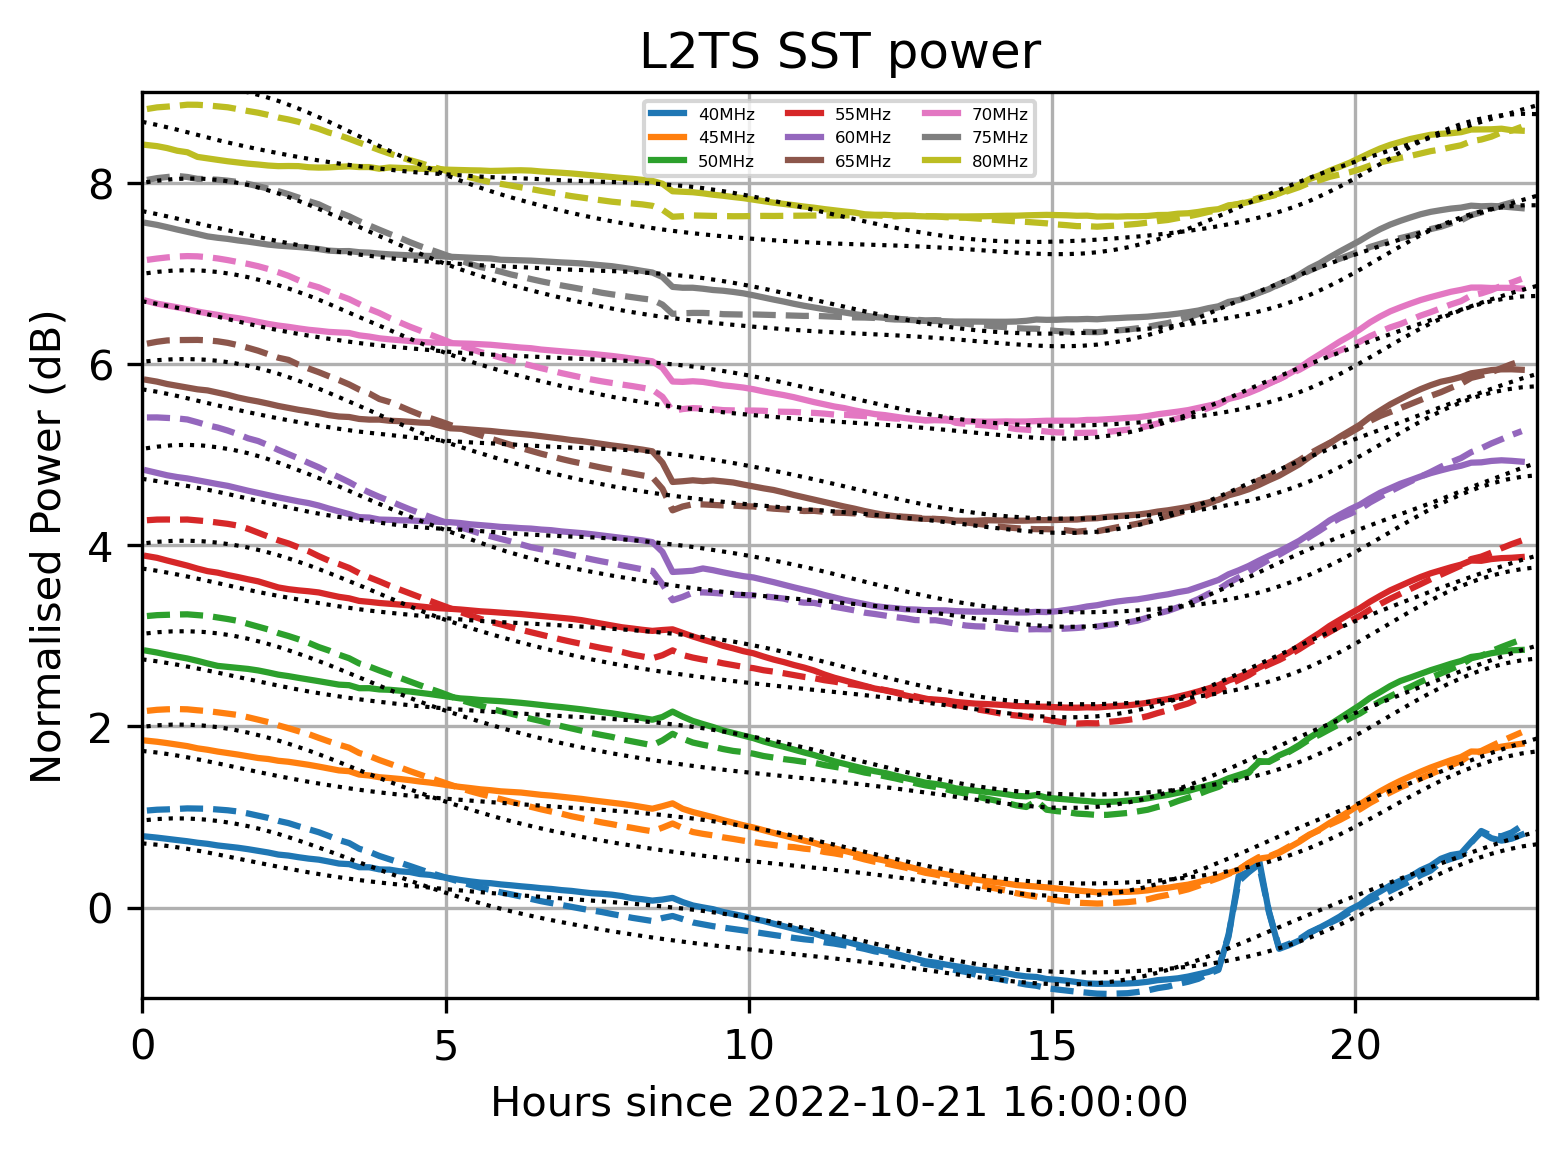

In [49]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/6+tsec/60/60
istart=0#20*360
istop=-1#int(21.6*360)
print("istart=",istart,istart/360)
for cnt,freq in enumerate(range(40,85,5)):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[istart:istop,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day[istart:istop],Pwr+cnt,label='%iMHz'%freq);
#    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
plt.gca().set_prop_cycle(None)
for cnt,freq in enumerate(range(40,85,5)):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[istart:istop,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day[istart:istop],Pwr+cnt,'--');


skyhour=np.arange(25*60/15)/4
for cnt,freq in enumerate(range(40,85,5)):
    sky=np.load("../L2TS_cal/Sky2022-11-04-15-00-00_%iMHz.npy"%freq)
    skyP=10*np.log10(sky[0,:])
    skyP-=np.mean(skyP)
    plt.plot(skyhour,skyP.T+cnt,'k:',linewidth=1)

    skyP=10*np.log10(sky[1,:])
    skyP-=np.mean(skyP)
    plt.plot(skyhour-1,skyP.T+cnt,'k:',linewidth=1)
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize=4,ncol=3)
plt.xlabel('Hours since 2022-10-21 16:00:00')
plt.title("L2TS SST power")
plt.grid()
plt.xlim(0,23)
plt.ylim(-1,9)

istart= 0 0.0


(-1.0, 9.0)

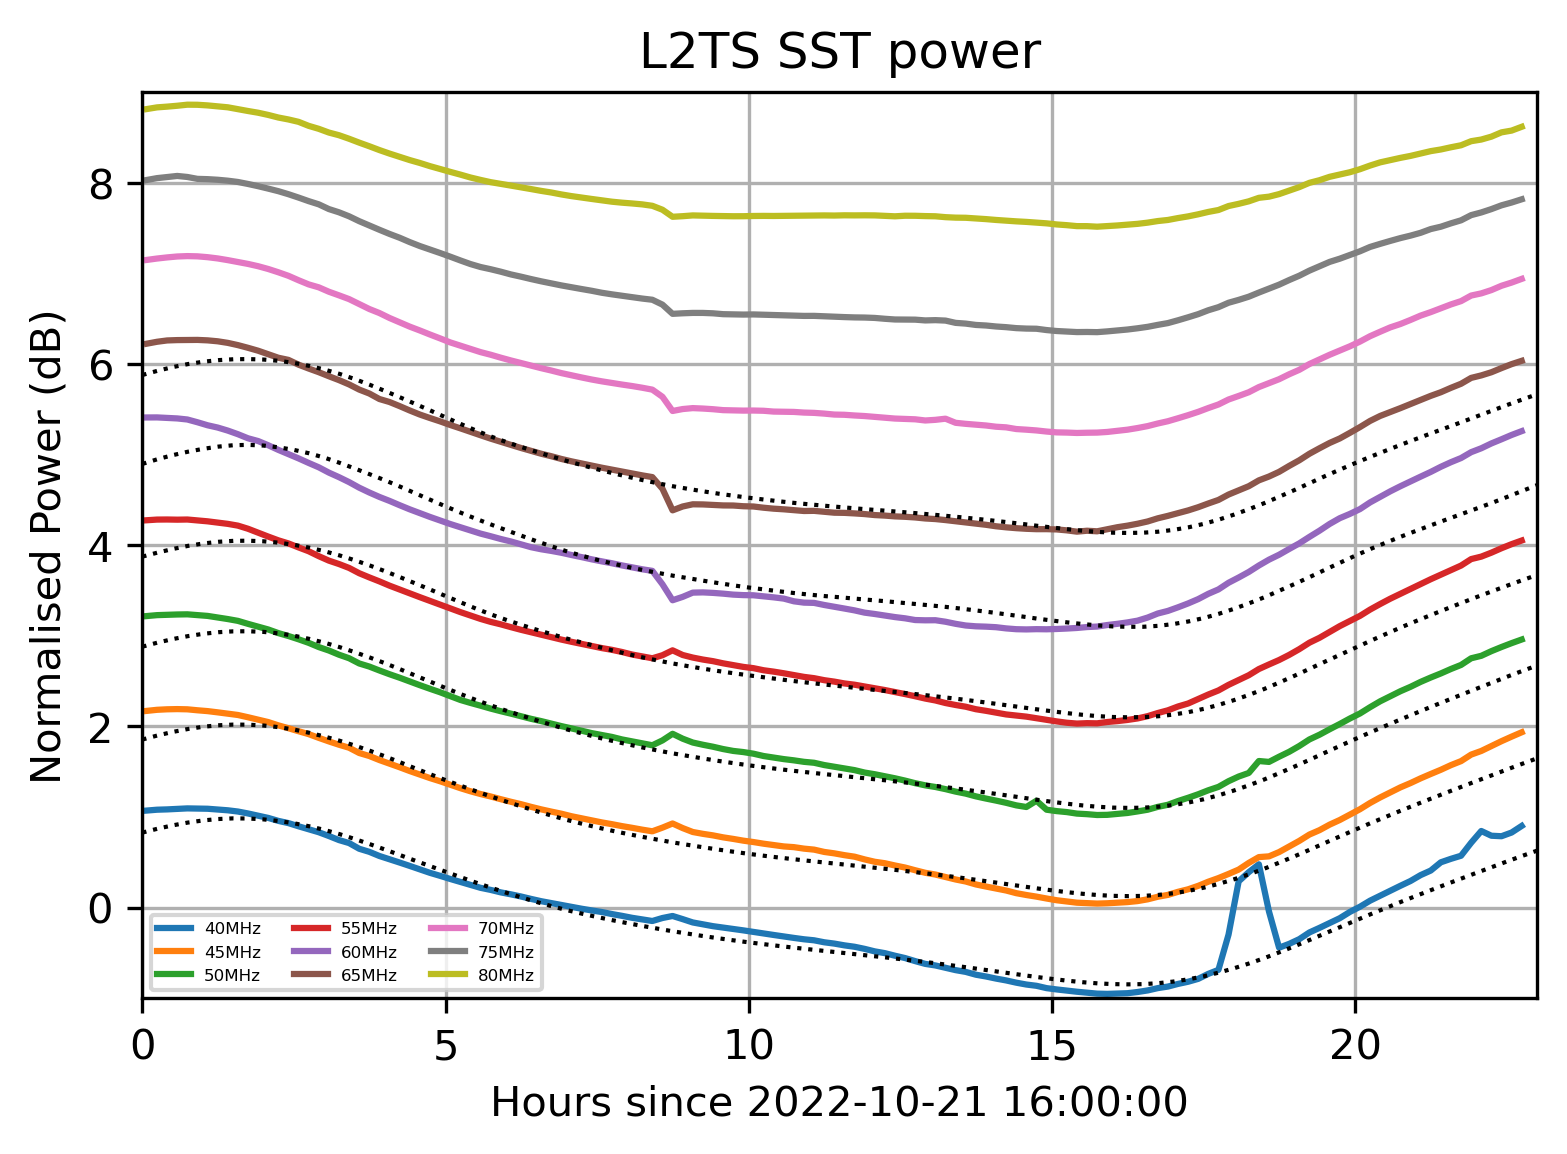

In [43]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/6+tsec/60/60
istart=0#20*360
istop=-1#int(21.6*360)
print("istart=",istart,istart/360)
for cnt,freq in enumerate(range(40,85,5)):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[istart:istop,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day[istart:istop],Pwr+cnt,label='%iMHz'%freq);
#    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
skyhour=np.arange(25*60/15)/4
for cnt,freq in enumerate(range(40,70,5)):
    sky=np.load("../L2TS_cal/Sky2022-11-04-15-00-00_%iMHz.npy"%freq)
    skyP=10*np.log10(sky[1,:])
    skyP-=np.mean(skyP)
    plt.plot(skyhour,skyP.T+cnt,'k:',linewidth=1)
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize=4,ncol=3)
plt.xlabel('Hours since 2022-10-21 16:00:00')
plt.title("L2TS SST power")
plt.grid()
plt.xlim(0,23)
plt.ylim(-1,9)

In [31]:
skyD=np.load("../L2TS_cal/SkyPwrFreq2022-10-21-15-00-00.npz")

15.075555555555555


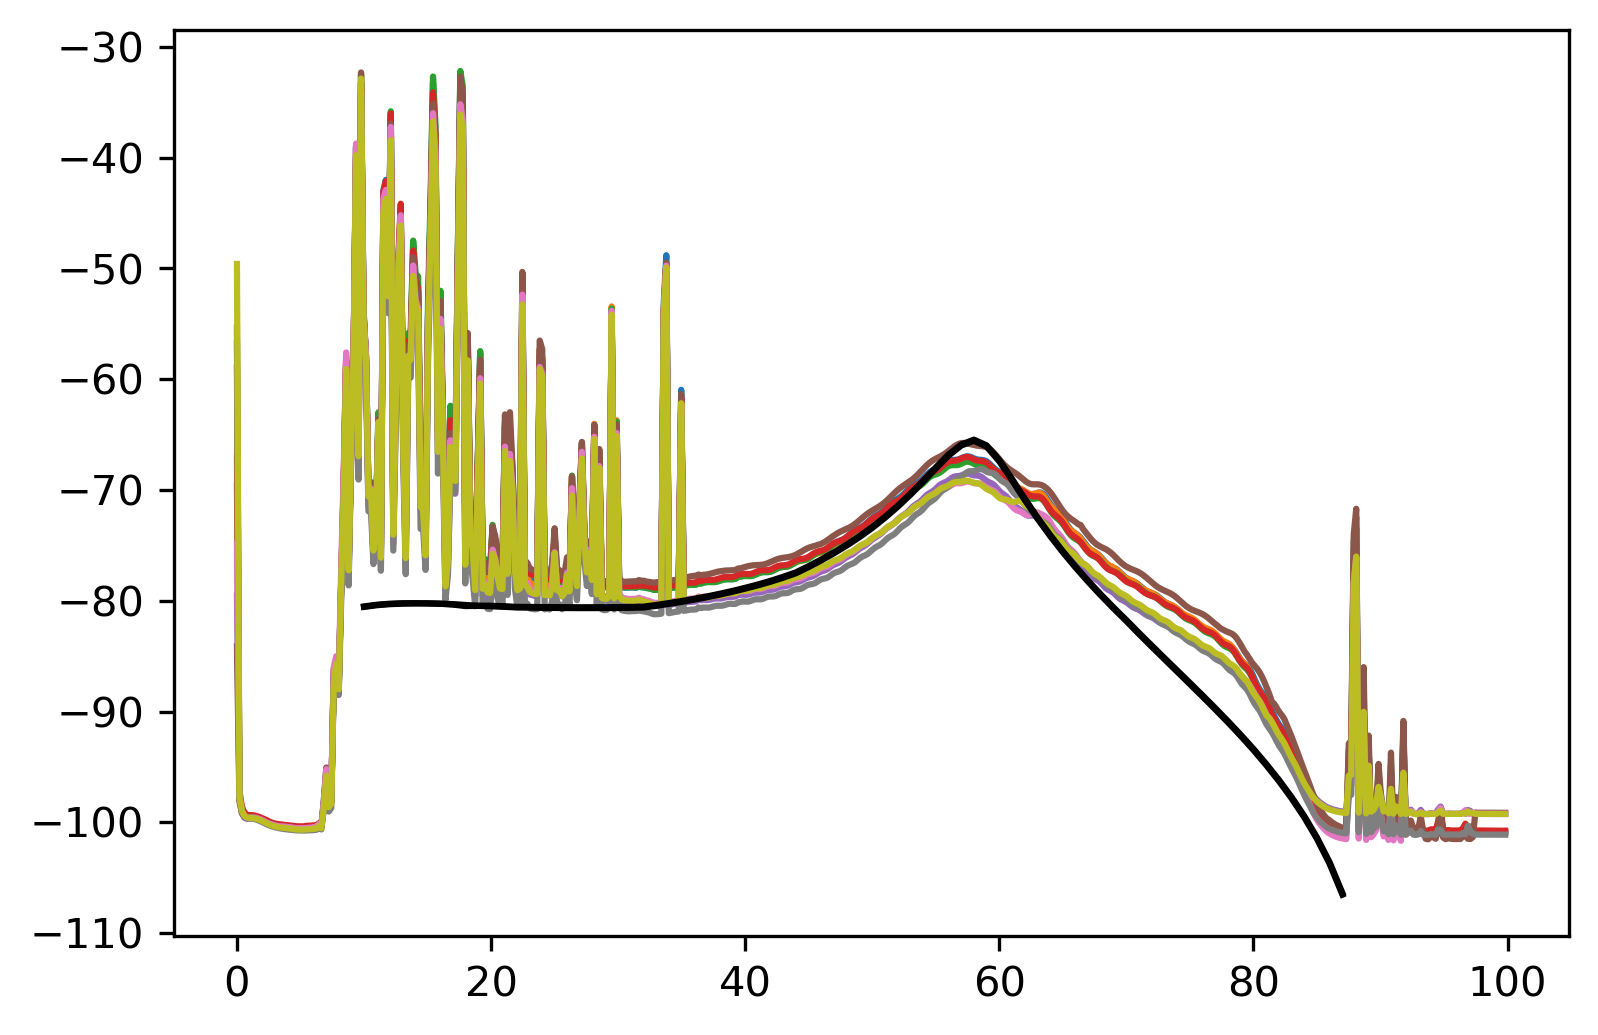

In [32]:
plt.figure(dpi=300)
ihour=np.argmin(np.abs(hour_of_day-15))
print(hour_of_day[ihour])
Pwr=(10*np.log10(D[ihour,1::2,:]))-GainADC
plt.plot(freqs,Pwr.T);
plt.plot(skyD['freq'],10*np.log10(skyD['pwr'])-170,'k-')

In [130]:
plt.figure(dpi=300)
skyP=10*np.log10(sky[:,1])
skyP-=np.mean(skyP,axis=1)[:,np.newaxis]
plt.plot(skyhour,skyP.T,'-')
plt.ylabel('Power (dBFS)')
plt.legend(fontsize='small',ncol=2)
plt.xlabel('Hour of day (%s)'%SSTdate)
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


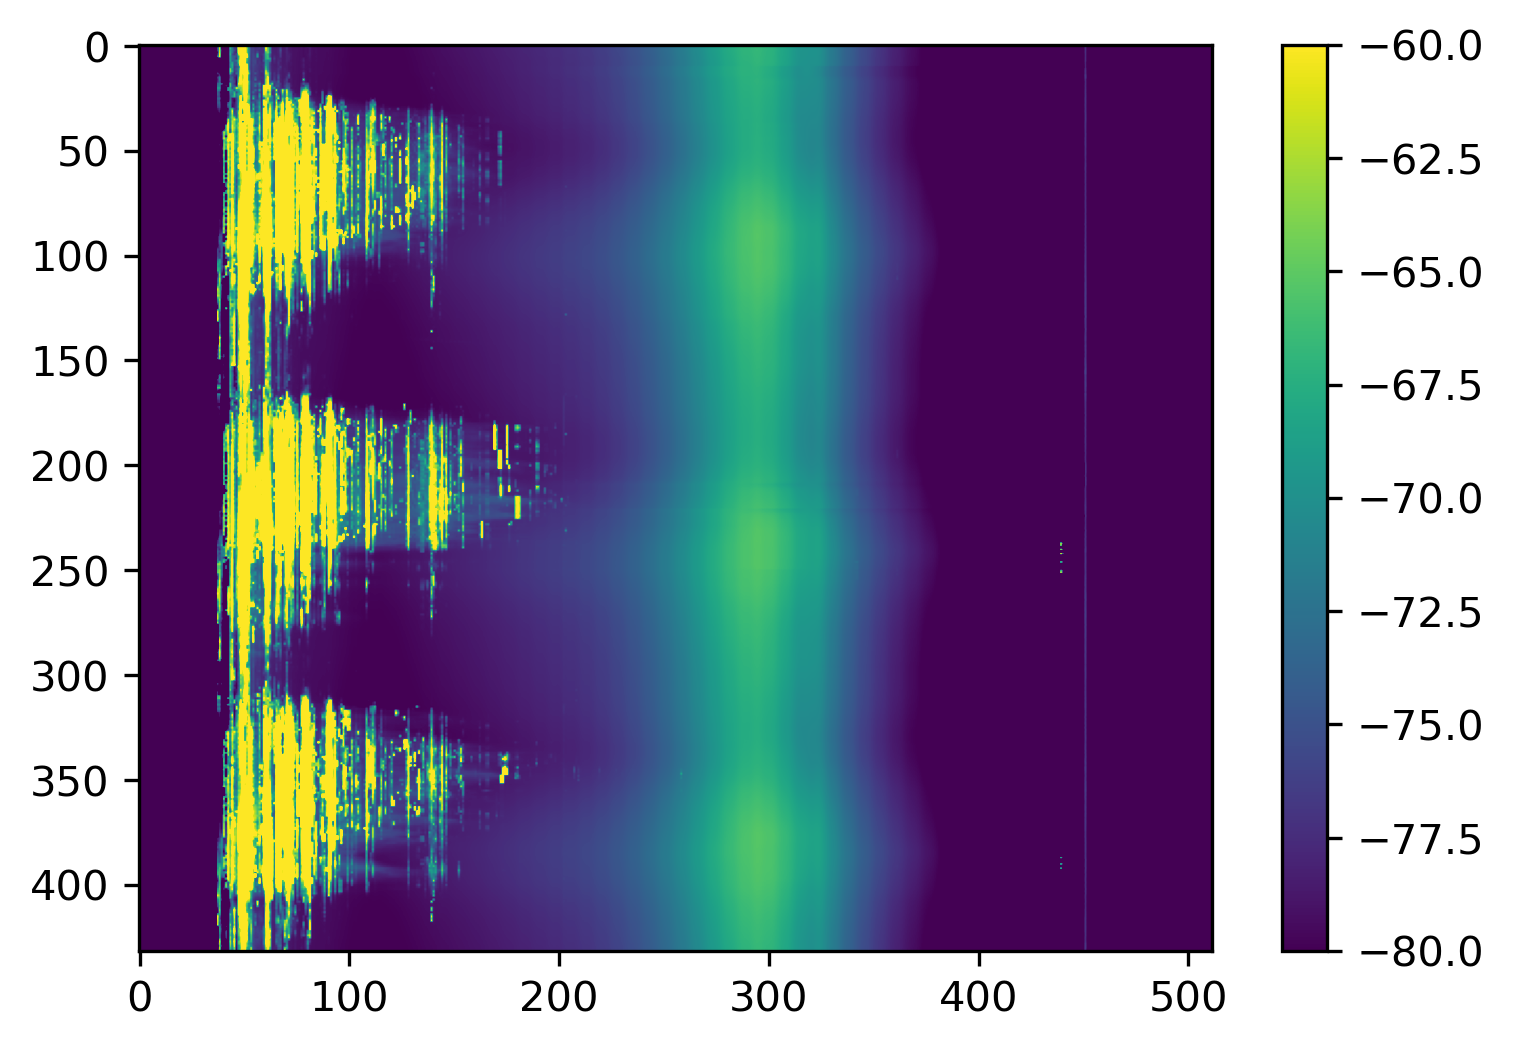

In [81]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
plt.colorbar()

In [109]:
pwr3=10*np.log10(D[:,17,:])-GainADC
plt.figure(dpi=300)
for x in range(5):
    plt.plot(np.mean(pwr3[(x*10+0):(x*10+10)],axis=0),linewidth=0.5)

In [181]:

D3=[]
flist=[]
for f in files[:4]:
  print(f)
  D2=np.load(fpath+'/'+f)[:,:18,:]
  ns=D2.shape
#  print(ns)
  if ns[0]!=3600: continue;
  D2=D2.reshape(ns[0]//10,10,ns[1],ns[2])
  D2=np.percentile(D2,50,axis=1)
  D3.append(D2)
  flist.append(f)
  print("    ",D3[-1].shape)
D3=np.array(D3)
print(D3.shape)
ns=D3.shape
D3=D3.reshape([ns[0]*ns[1],ns[2],ns[3]])
print(D3.shape)


SST_2022-10-21-00-53-49.npy
     (360, 18, 512)
SST_2022-10-21-01-53-49.npy
     (360, 18, 512)
SST_2022-10-21-02-53-49.npy
     (360, 18, 512)
SST_2022-10-21-03-53-49.npy
     (360, 18, 512)
(4, 360, 18, 512)
(1440, 18, 512)


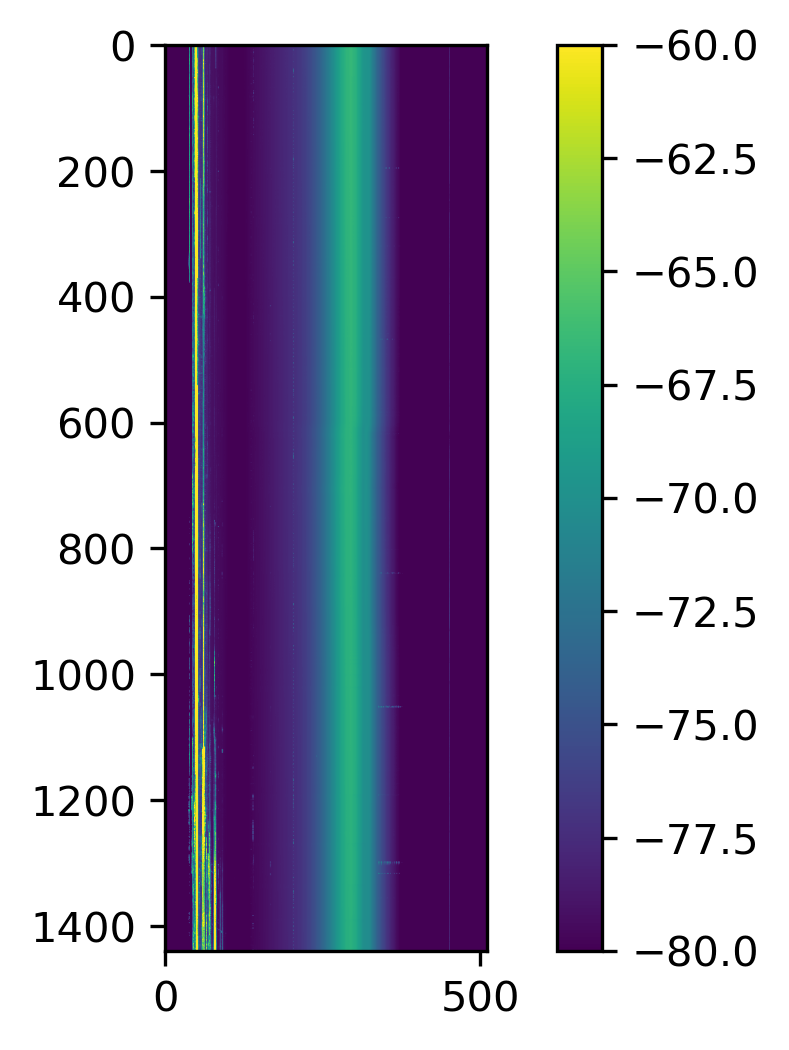

In [192]:
plt.figure(dpi=300)
pwr3=10*np.log10(D3[:,1,:])-GainADC
plt.imshow(pwr3,vmin=-80,vmax=-60)
plt.colorbar()

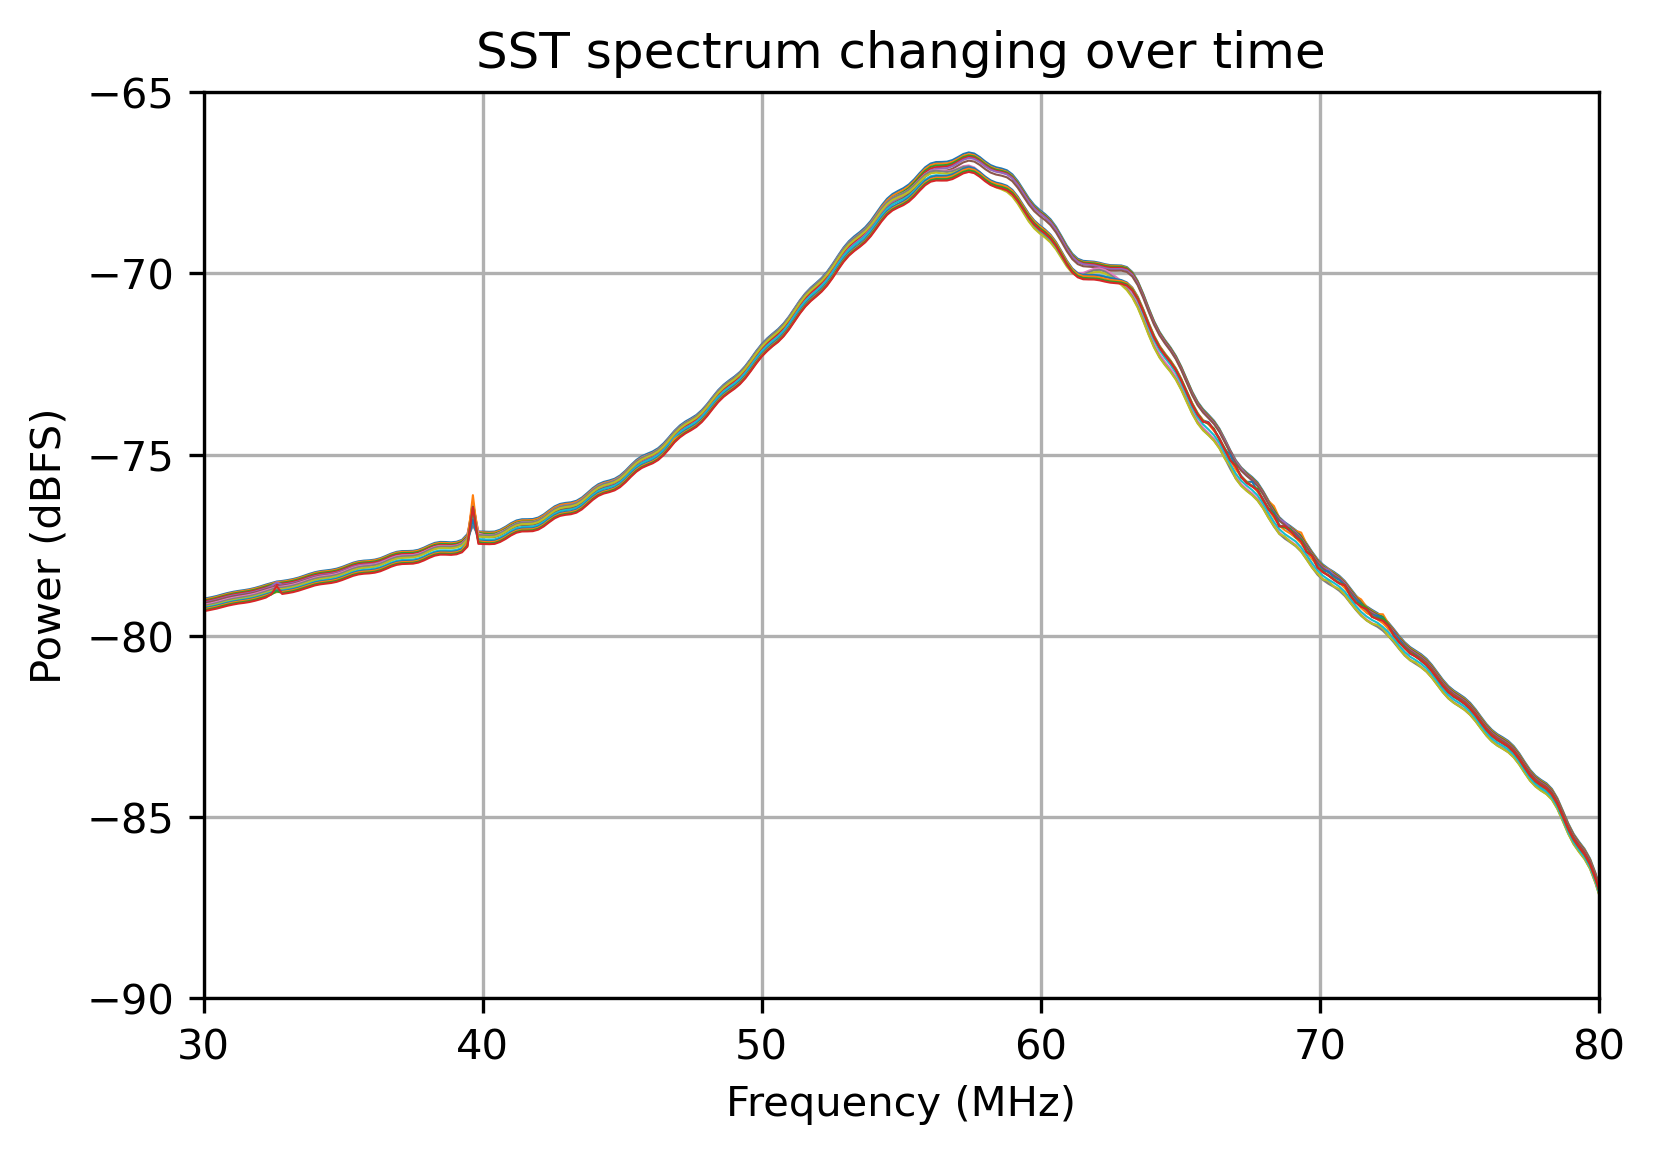

In [193]:
plt.figure(dpi=300)
for x in range(14):
    plt.plot(freqs,np.mean(pwr3[(x*100+0):(x*100+100)],axis=0),linewidth=0.5)
plt.ylim(-90,-65)
plt.xlim(30,80)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBFS)")
plt.title("SST spectrum changing over time")
plt.grid()

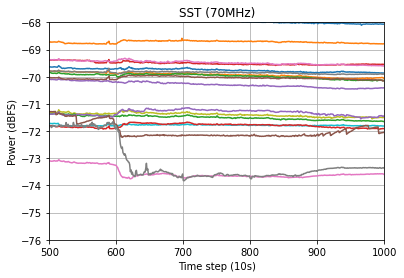

In [191]:
P4=10*np.log10(D3[:,::,i3])-GainADC
plt.plot(P4)
plt.ylim(-76,-68)
plt.xlim(500,1000)
plt.ylabel("Power (dBFS)")
plt.xlabel("Time step (10s)")
plt.title("SST (70MHz)")
plt.grid()